In [14]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp
plt.rcParams["figure.figsize"] = (10, 6)

# Load the data
data = pd.read_csv("logic.csv")
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


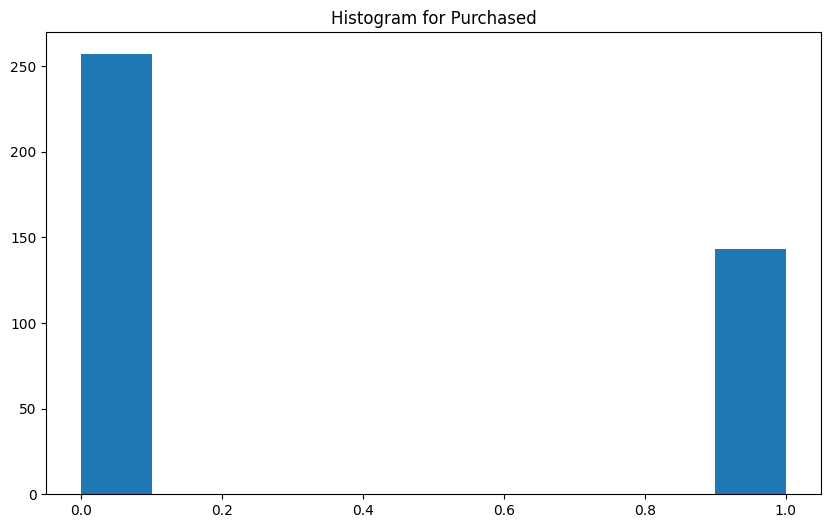

In [15]:
# histogram of total_bills
plt.hist(data['Purchased'])

plt.title("Histogram for Purchased")

# Adding the legends
plt.show()


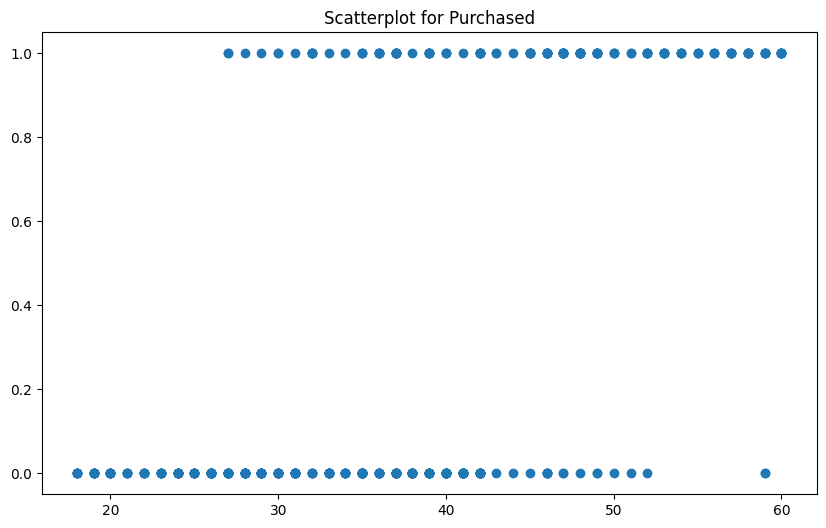

In [16]:

# Visualizing the dataset
plt.scatter(data['Age'], data['Purchased'])
plt.title("Scatterplot for Purchased")
plt.show()

# Divide the data to training set and test set
X_train, X_test, y_train, y_test = train_test_split(data['Age'], data['Purchased'], test_size=0.20)

In [17]:
# Creating the logistic regression model

# Helper function to normalize data
def normalize(X):
    return X - X.mean()

# Method to make predictions
def predict(X, b0, b1):
    return np.array([1 / (1 + exp(-1*b0 + -1*b1*x)) for x in X])

# Method to train the model
def logistic_regression(X, Y):

    X = normalize(X)

    # Initializing variables
    b0 = 0
    b1 = 0
    L = 0.001
    epochs = 300

    for epoch in range(epochs):
        y_pred = predict(X, b0, b1)
        D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b0
        D_b1 = -2 * sum(X * (Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b1
        # Update b0 and b1
        b0 = b0 - L * D_b0
        b1 = b1 - L * D_b1
    
    return b0, b1

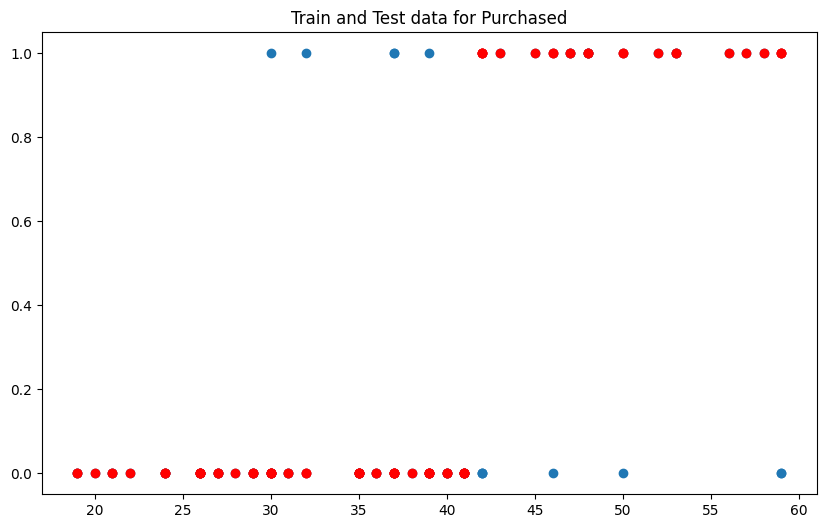

Accuracy = 0.85


In [18]:
# Training the model
b0, b1 = logistic_regression(X_train, y_train)

# Making predictions
X_test_norm = normalize(X_test)
y_pred = predict(X_test_norm, b0, b1)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, c="red")
plt.title("Train and Test data for Purchased")
plt.show()

# The accuracy
accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        accuracy += 1
print(f"Accuracy = {accuracy / len(y_pred)}") 



C:\Users\Jeffrey\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


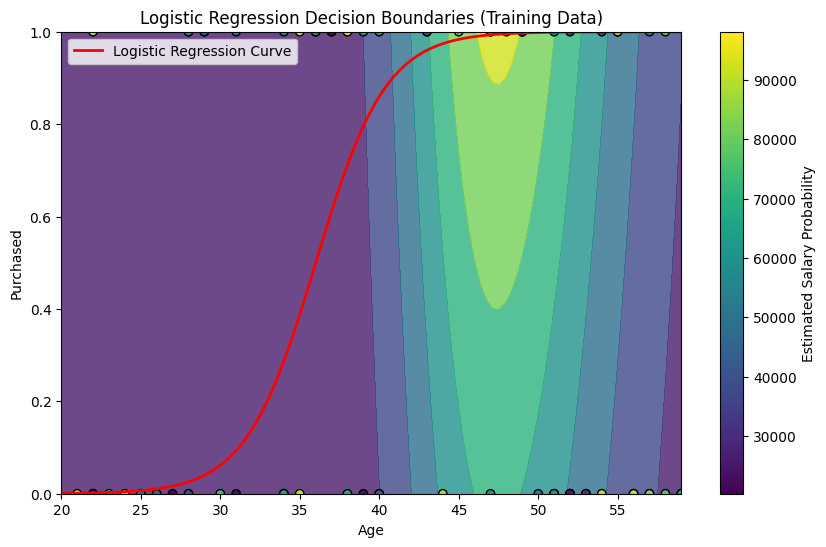

In [22]:
X = data[['Age', 'Purchased']].values
y = data['EstimatedSalary'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a logistic regression model
logreg = LogisticRegression()

# Train the model using the training sets
logreg.fit(X_train, y_train)

# Plot the sigmoid function
x_values = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
y_values = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
xx, yy = np.meshgrid(x_values, y_values)
Z = logreg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.8)

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', edgecolors='k')
plt.xlabel('Age')
plt.ylabel('Purchased')
plt.title('Logistic Regression Decision Boundaries (Training Data)')
plt.colorbar(label='Estimated Salary Probability')

# Plot the sigmoid function (logistic regression curve)
x_values = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
intercept = logreg.intercept_[0]
slope_age, slope_purchased = logreg.coef_[0]
y_values = 1 / (1 + np.exp(-(slope_age * x_values + slope_purchased * 1 + intercept)))
plt.plot(x_values, y_values, color='red', linewidth=2, label='Logistic Regression Curve')

plt.legend()
plt.show()